In [1]:
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
boston = load_boston()
X = boston.data
Y = boston.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [4]:
## Here I am standartizing the dataset
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
## Here I am adding the 'price' Column in the data
train_data=pd.DataFrame(X_train)
train_data['price'] = y_train
train_data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,-0.207356,-0.499979,1.548016,-0.263603,0.588213,-1.839367,1.107402,-1.125110,-0.618160,0.206735,1.227257,0.424543,3.108073,14.4
1,-0.388865,0.346774,-0.589747,-0.263603,-0.797821,0.327487,-0.367661,0.075090,-0.733637,-1.049493,0.056963,0.401853,-0.666430,24.4
2,-0.335735,-0.499979,1.548016,-0.263603,0.588213,0.037907,1.043114,-0.799984,-0.618160,0.206735,1.227257,0.398461,0.639367,18.1


In [6]:
X_test=np.array(X_test)
y_test=np.array(y_test)

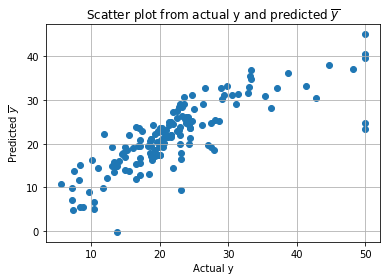

In [7]:
clf_ = SGDRegressor(max_iter = 1000)
clf_.fit(X_train, y_train)
y_sgd=clf_.predict(X_test)
plt.scatter(y_test,y_sgd)
plt.grid()
plt.xlabel("Actual y")
plt.ylabel("Predicted $\overline{y}$")
plt.title("Scatter plot from actual y and predicted $\overline{y}$")
plt.show()


In [8]:
print('MSE :',mean_squared_error(y_test, y_sgd))

MSE : 27.741568097865855


In [9]:
## predicted y 
def predict(x,w,b):
    y_predicted = []
    for i in range(len(x)):
        y = np.asscalar(np.dot(w,x[i])+b)
        y_predicted.append(y)
    return np.array(y_predicted)
## gradient of w 
def w_grad(x,y,w,predict):
    grad = (-2)*x*(y-(predict))+2*0.1*w
    return grad 
## gradient of b
def b_grad(y, predict): 
    grad = (-2)*(y-(predict))
    return grad
    

In [10]:
## sdg function for ridge regression
def SGD_Ridge(train_data,l_rate,n_iter,k):
    w = np.zeros(shape=(1,train_data.shape[1]-1))
    b = 0
    j = 1
    while(j<=n_iter): 
        temp=train_data.sample(k)
        y=np.array(temp['price'])
        x=np.array(temp.drop('price',axis=1))
        w_n=np.zeros(shape=(1,train_data.shape[1]-1))
        b_n=0
        for i in range(k):
            predict=np.dot(w,x[i])+b 
            wgrad= w_grad(x[i],y[i],w,predict)
            w_n=w_n+wgrad
            bgrad = b_grad(y[i],predict)
            b_n= b_n + bgrad
        w=w-l_rate*(w_n/k)
        b=b-l_rate*(b_n/k)
        
        j=j+1
        
    return w,b

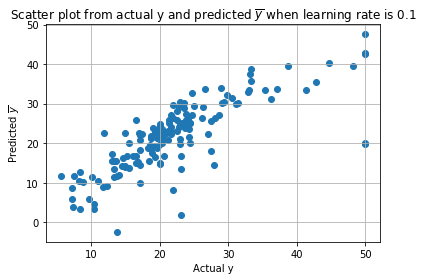

Mean Squared Error : 34.18835206190224


In [11]:
w,b=SGD_Ridge(train_data,0.1, 1000, 10)
y_pred = predict(X_test,w,b)

plt.scatter(y_test,y_pred)
plt.grid()
plt.xlabel("Actual y")
plt.ylabel("Predicted $\overline{y}$")
plt.title("Scatter plot from actual y and predicted $\overline{y}$ when learning rate is 0.1")
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred))

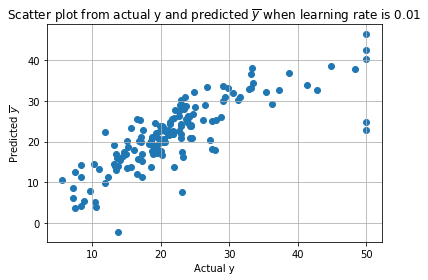

Mean Squared Error : 28.957268966620948


In [12]:
w,b=SGD_Ridge(train_data,0.01, 1000, 10)
y_pred = predict(X_test,w,b) 

plt.scatter(y_test,y_pred)
plt.grid()
plt.xlabel("Actual y")
plt.ylabel("Predicted $\overline{y}$")
plt.title("Scatter plot from actual y and predicted $\overline{y}$ when learning rate is 0.01")
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred))

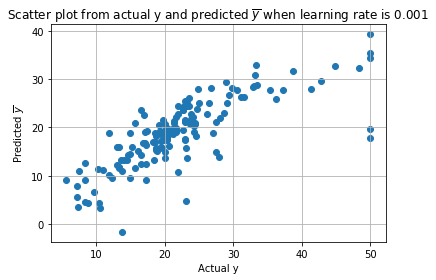

Mean Squared Error : 40.91686286936158


In [13]:
w,b=SGD_Ridge(train_data,0.001, 1000, 10)
y_pred = predict(X_test,w,b) 

plt.scatter(y_test,y_pred)
plt.grid()
plt.xlabel("Actual y")
plt.ylabel("Predicted $\overline{y}$")
plt.title("Scatter plot from actual y and predicted $\overline{y}$ when learning rate is 0.001")
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred))